<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [37]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "../../Data/Sacramento_transactions.csv"


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [3]:
# ANSWER

# The Target Variable is price. 

df=pd.read_csv(house_csv)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


#### 2.2 List all possible variables which might be Predictor variable.

In [4]:
# ANSWER

# Potential predictor variables are zip, beds, baths, sq_ft, latitude and longitude. 

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [5]:
# ANSWER

predictors = df[['price', 'zip', 'beds', 'baths', 'sq__ft', 'latitude', 'longitude']]

predictors.corr()

,price,zip,beds,baths,sq__ft,latitude,longitude
price,1.000000,-0.093353,0.342024,0.416208,0.333897,-0.039573,0.284485
zip,-0.093353,1.000000,0.125319,0.069165,0.130108,-0.290389,-0.539904
beds,0.342024,0.125319,1.000000,0.839650,0.684041,-0.291307,-0.053993
baths,0.416208,0.069165,0.839650,1.000000,0.665690,-0.235792,0.016582
sq__ft,0.333897,0.130108,0.684041,0.665690,1.000000,-0.383274,-0.177742
latitude,-0.039573,-0.290389,-0.291307,-0.235792,-0.383274,1.000000,0.387925
longitude,0.284485,-0.539904,-0.053993,0.016582,-0.177742,0.387925,1.000000


In [6]:
# The best predictor is baths, then beds and sq__ft. 

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [7]:
# ANSWER

price_mean = df['price'].mean()
baths_mean = df['baths'].mean()

price_per_bath = price_mean / baths_mean
print(price_per_bath)

131789.77142857143


In [8]:
def house_price(baths):
    price_est = baths * price_per_bath
    print("Estimated house price is $" + str(price_est.round(2)))

house_price(2)

Estimated house price is $263579.54


#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [9]:
# ANSWER

houses_baths = df['baths']

def house_prices(baths):
    price_ests = []
    for bath in baths:
        price_est = bath * price_per_bath
        price_ests.append(price_est.round(2))
    return price_ests

house_price_predictions = house_prices(houses_baths)

bath_price = df[['baths', 'price']]

bath_price['mean_prediction'] = house_price_predictions

bath_price['residuals'] = abs(bath_price['price'] - bath_price['mean_prediction'])

bath_price.head()

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_13384\3776991479.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath_price['mean_prediction'] = house_price_predictions
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_13384\3776991479.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath_price['residuals'] = abs(bath_price['price'] - bath_price['mean_prediction'])


,baths,price,mean_prediction,residuals
0,1,59222,131789.77,72567.77
1,1,68212,131789.77,63577.77
2,1,68880,131789.77,62909.77
3,1,69307,131789.77,62482.77
4,1,81900,131789.77,49889.77


#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [10]:
# ANSWER

X = df['baths']
Y = df['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [12]:
# ANSWER
y_mean = Y.mean()
x_mean = X.mean()

def beta1_calc(X, Y):
    # top = sum([(yi - y_mean) for yi in Y]) * sum([(xi - x_mean) for xi in X])
    top = sum((x - x_mean) * (y - y_mean) for x, y in zip(X, Y))
    # bot = sum([(xi in X)])
    bot = sum((x - x_mean) ** 2 for x in X)

    beta1 = top / bot
    return beta1

print(beta1_calc(X, Y))

64318.53523673409


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [16]:
beta_1 = beta1_calc(X, Y)

In [18]:
# ANSWER

def beta0_calc(y_mean, beta_1, x_mean):
    beta0 = y_mean - (beta1 * x_mean)
    return beta0

print(beta0_calc(y_mean, beta1, x_mean))

119872.75465554858


##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [29]:
# ANSWER

beta0 = beta0_calc(y_mean, beta_1, x_mean)

def linear_price_pred(x_baths, beta0, beta1):
    linear_price_ests = []
    for x in x_baths:
        est = beta0 + (beta1 * x)
        linear_price_ests.append(est.round(2))
    return linear_price_ests

x_baths = df['baths']
price_preds = linear_price_pred(x_baths, beta0, beta1)



##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [30]:
bath_price.head()

,baths,price,mean_prediction,mean_residuals,linear_prediction,linear_residuals
0,1,59222,131789.77,72567.77,184191.289892,124969.289892
1,1,68212,131789.77,63577.77,184191.289892,115979.289892
2,1,68880,131789.77,62909.77,184191.289892,115311.289892
3,1,69307,131789.77,62482.77,184191.289892,114884.289892
4,1,81900,131789.77,49889.77,184191.289892,102291.289892


In [31]:
# ANSWER
bath_price.rename(columns={'residuals': 'mean_residuals'}, inplace=True)
bath_price['linear_prediction'] = price_preds
bath_price['linear_residuals'] = abs(bath_price['price'] - bath_price['linear_prediction'])

bath_price.head(20)


C:\Users\Dinesh\AppData\Local\Temp\ipykernel_13384\1454404884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath_price.rename(columns={'residuals': 'mean_residuals'}, inplace=True)
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_13384\1454404884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath_price['linear_prediction'] = price_preds
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_13384\1454404884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,baths,price,mean_prediction,mean_residuals,linear_prediction,linear_residuals
0,1,59222,131789.77,72567.77,184191.29,124969.29
1,1,68212,131789.77,63577.77,184191.29,115979.29
2,1,68880,131789.77,62909.77,184191.29,115311.29
3,1,69307,131789.77,62482.77,184191.29,114884.29
4,1,81900,131789.77,49889.77,184191.29,102291.29
5,1,89921,131789.77,41868.77,184191.29,94270.29
6,2,90895,263579.54,172684.54,248509.83,157614.83
7,1,91002,131789.77,40787.77,184191.29,93189.29
8,2,94905,263579.54,168674.54,248509.83,153604.83
9,2,98937,263579.54,164642.54,248509.83,149572.83


##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [34]:
# ANSWER

def r_sq(Y, y_mean, y_pred):
    ss_tot = sum((y - y_mean) ** 2 for y in Y)
    ss_res = sum((y - y_pred) ** 2 for y in Y)
    r2 = 1 - (ss_res / ss_tot)
    return r2

bath_price['mean_r_sq'] = r_sq(Y, y_mean, bath_price['mean_prediction'])
bath_price['linear_r_sq'] = r_sq(Y, y_mean, bath_price['linear_prediction'])
bath_price.head(30)

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_13384\2834320098.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath_price['mean_r_sq'] = r_sq(Y, y_mean, bath_price['mean_prediction'])
C:\Users\Dinesh\AppData\Local\Temp\ipykernel_13384\2834320098.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath_price['linear_r_sq'] = r_sq(Y, y_mean, bath_price['linear_prediction'])


,baths,price,mean_prediction,mean_residuals,linear_prediction,linear_residuals,mean_r_sq,linear_r_sq
0,1,59222,131789.77,72567.77,184191.29,124969.29,-0.547769,-0.130469
1,1,68212,131789.77,63577.77,184191.29,115979.29,-0.547769,-0.130469
2,1,68880,131789.77,62909.77,184191.29,115311.29,-0.547769,-0.130469
3,1,69307,131789.77,62482.77,184191.29,114884.29,-0.547769,-0.130469
4,1,81900,131789.77,49889.77,184191.29,102291.29,-0.547769,-0.130469
5,1,89921,131789.77,41868.77,184191.29,94270.29,-0.547769,-0.130469
6,2,90895,263579.54,172684.54,248509.83,157614.83,-0.045302,-0.010790
7,1,91002,131789.77,40787.77,184191.29,93189.29,-0.547769,-0.130469
8,2,94905,263579.54,168674.54,248509.83,153604.83,-0.045302,-0.010790
9,2,98937,263579.54,164642.54,248509.83,149572.83,-0.045302,-0.010790


##### 2.7.F [BONUS] Draw Plot of Predicted Line

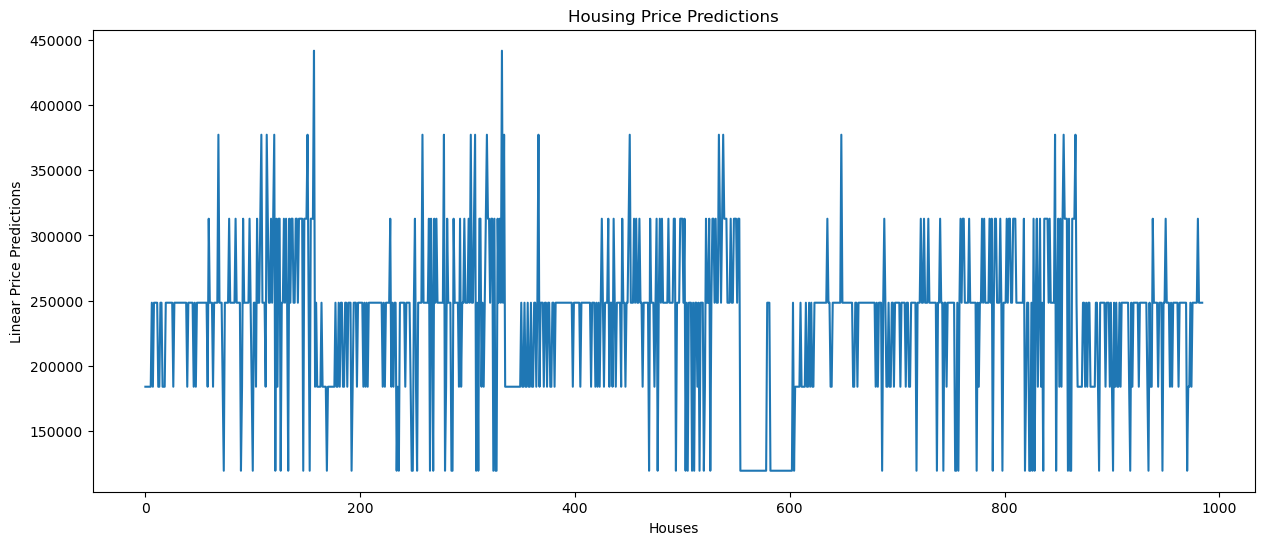

In [41]:
# ANSWER

plt.figure(figsize=(15, 6))
plt.plot(bath_price.index, bath_price['linear_prediction'])
plt.xlabel('Houses')
plt.ylabel('Linear Price Predictions')
plt.title('Housing Price Predictions')

plt.show()

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

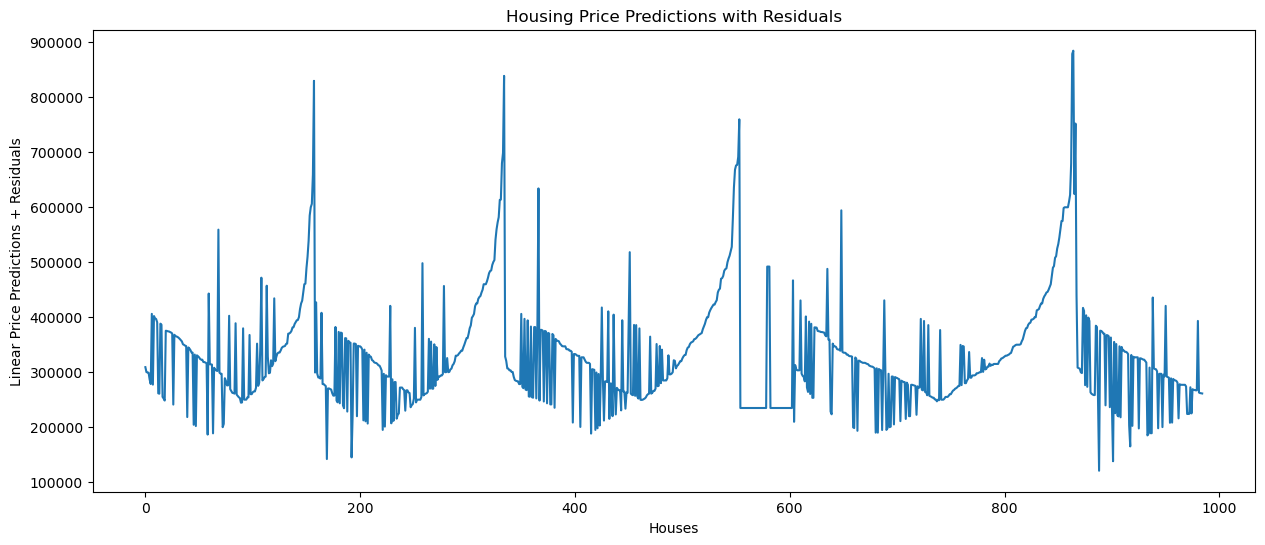

In [42]:
# ANSWER
y_vals = bath_price['linear_prediction'] + bath_price['linear_residuals']
plt.figure(figsize=(15, 6))
plt.plot(bath_price.index, y_vals)
plt.xlabel('Houses')
plt.ylabel('Linear Price Predictions + Residuals')
plt.title('Housing Price Predictions with Residuals')

plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [46]:
# ANSWER

single_house_price_pred = beta0 + (beta1 * 3)
print("$"+str(single_house_price_pred.round(2)))

$312828.36




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



